In [1]:
import itertools
from sklearn.metrics import confusion_matrix
### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix, cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test,rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

In [2]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Supress warnings
import warnings
warnings.filterwarnings("ignore")
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis ,QuadraticDiscriminantAnalysis
# Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score,ShuffleSplit, cross_validate
# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
# Classification
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score,roc_auc_score, roc_curve, auc, cohen_kappa_score
## To display all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df=pd.read_csv(r"C:\Users\sheet\Dropbox\PC\Downloads\Toddler Autism dataset.csv")
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [6]:
df.shape

(1054, 19)

In [7]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [8]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [9]:
df.replace("?",np.NaN,inplace=True)
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [10]:
# Checking null data
df.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [11]:
# Calculating the percentage of adults shows the symptoms of autisim
yes_autism= df[df['Class/ASD Traits ']=='Yes']
no_autism= df[df['Class/ASD Traits ']=='No']
print("adults_yes:",round(len(yes_autism)/len(df) * 100,2))
print("adults_no:",round(len(no_autism)/len(df) * 100,2))

adults_yes: 69.07
adults_no: 30.93


In [12]:
# Displaying the content of the target column
df['Class/ASD Traits '].value_counts()

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

([<matplotlib.patches.Wedge at 0x24f50f35160>,
 [Text(-0.9910065639807614, -0.676687512923835, 'no_autism'),
  Text(0.908422683649031, 0.620296886846849, 'yes_autism')],
 [Text(-0.5780871623221108, -0.39473438253890375, '69.1%'),
  Text(0.4955032819903805, 0.3383437564619176, '30.9%')])

(-1.1964412814503307,
 1.1171489052994765,
 -1.1740720739103871,
 1.1035272416147803)

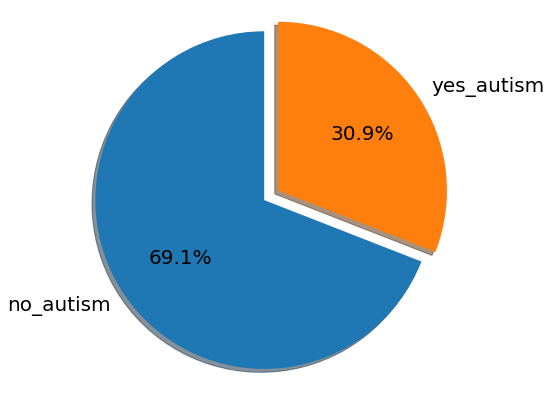

In [13]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.rcParams.update({'font.size': 20})
fig.set_size_inches(7,7)
plt.pie(df['Class/ASD Traits '].value_counts(),labels=('no_autism','yes_autism'),explode = [0.1,0],autopct='%1.1f%%' ,shadow = True,startangle = 90,labeldistance = 1.1)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Who completed the test', ylabel='count'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'family member'),
  Text(1, 0, 'Health Care Professional'),
  Text(2, 0, 'Health care professional'),
  Text(3, 0, 'Self'),
  Text(4, 0, 'Others')])

(array([  0., 200., 400., 600., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 864x576 with 0 Axes>

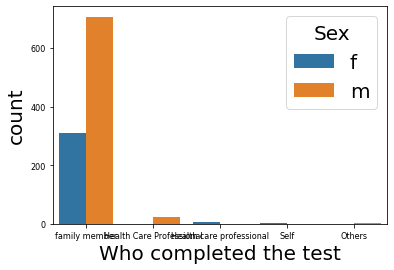

<Figure size 864x576 with 0 Axes>

In [14]:
sns.countplot(x = 'Who completed the test', hue = 'Sex', data = df)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.figure(figsize = (12,8))

<AxesSubplot:xlabel='Age_Mons', ylabel='count'>

Text(0.5, 0, 'Age_Mons')

Text(0.5, 1.0, 'Age distribution of ASD positive in Children')

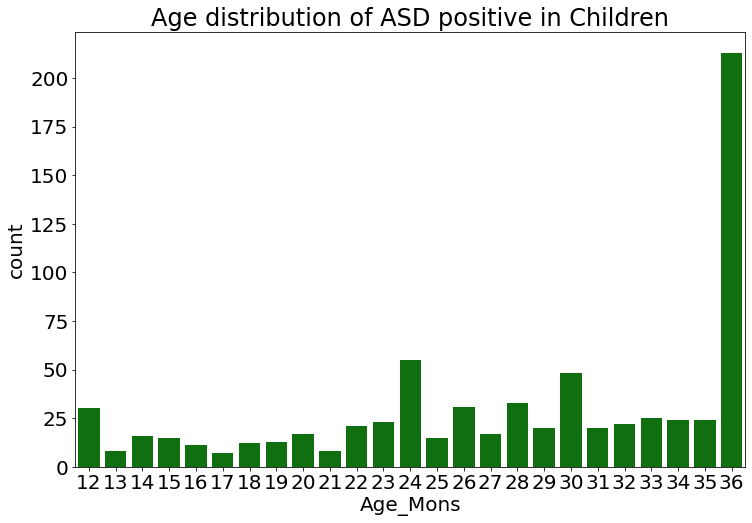

In [15]:
#Visualizing the age distribution of Positive ASD Child
f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="Age_Mons", data=yes_autism, color="g");
ax.set_xlabel('Age_Mons')
ax.set_title('Age distribution of ASD positive in Children')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Class/ASD Traits ', ylabel='count'>

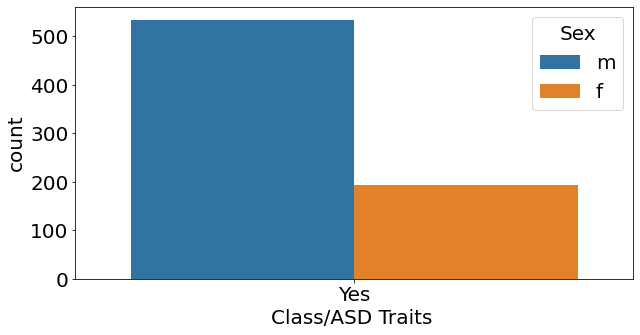

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Class/ASD Traits ', hue = 'Sex', data = yes_autism)

<Figure size 864x576 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

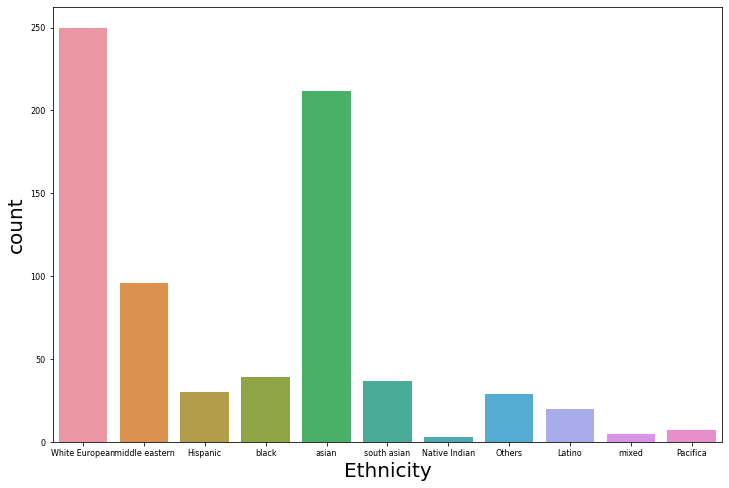

In [17]:
plt.figure(figsize = (12,8))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.countplot(x = 'Ethnicity', data = yes_autism)

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

Text(0.5, 1.0, 'Ethnicity Distribution of Positive ASD In Adult')

Text(0.5, 0, 'Ethnicity')

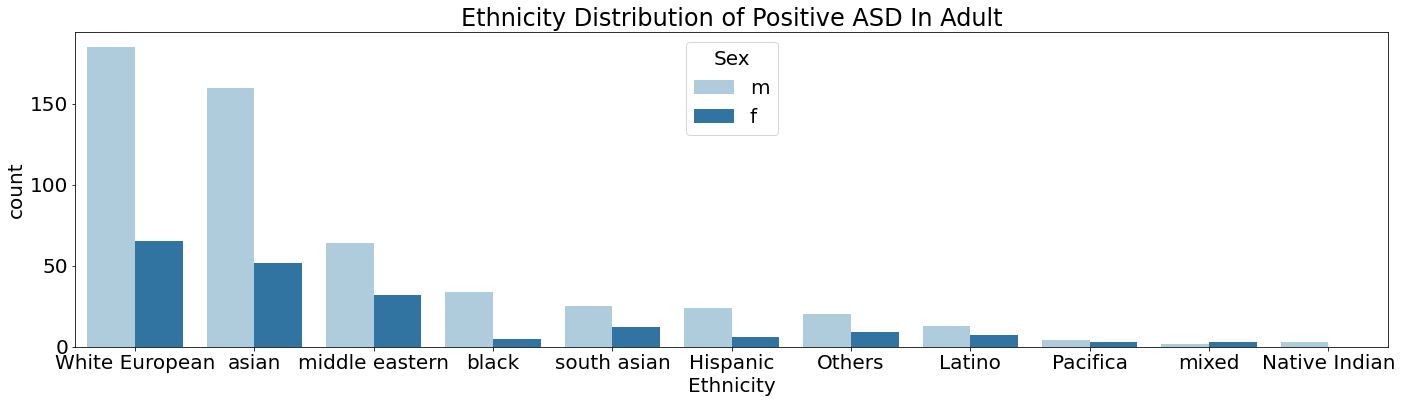

In [18]:
 # visualize positive ASD based on Ethnicity
plt.figure(figsize=(20,6))
sns.countplot(x='Ethnicity',data=yes_autism,order= yes_autism['Ethnicity'].value_counts().index[:11],hue='Sex',palette='Paired')
plt.title('Ethnicity Distribution of Positive ASD In Adult')
plt.xlabel('Ethnicity')
plt.tight_layout()

In [19]:
 #Displaying number of positive cases of Autisim with Regards Ethnicity
yes_autism['Ethnicity'].value_counts()

White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

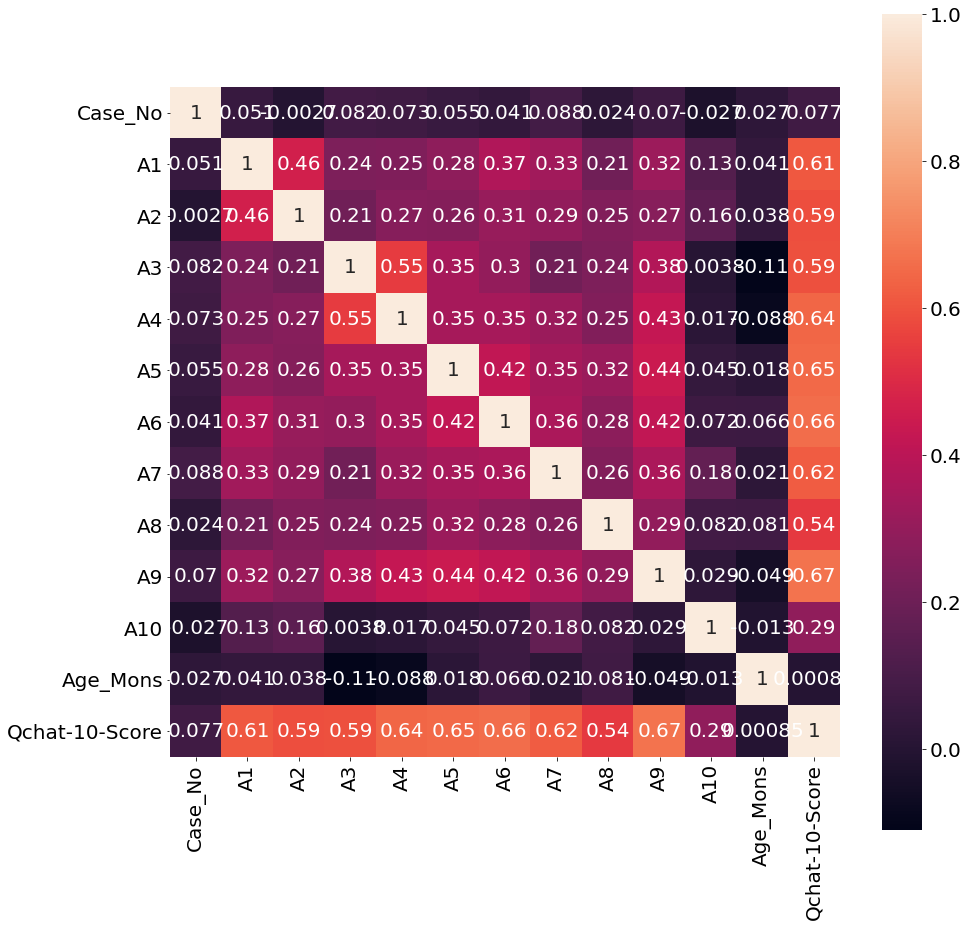

In [20]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

In [21]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

In [22]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,4,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,4,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,4,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,4,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,0,5,0,1,4,0
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,1,7,1,0,4,1
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,1,8,1,0,4,1
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,1,5,0,1,4,0


In [23]:
X = df.drop(['Class/ASD Traits '], axis = 1)
y = df['Class/ASD Traits ']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size = .80)

RandomForestClassifier()

RF Accuracy Score is :  1.0
Model: RF
------------------------------------------------------------


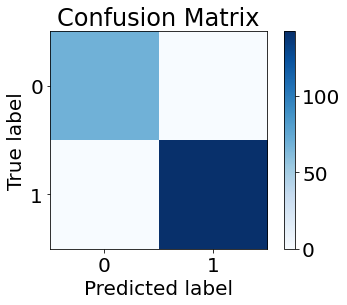

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           0  142  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted av

KNeighborsClassifier()

KNN Accuracy Score is :  0.7440758293838863
Model: KNN
------------------------------------------------------------


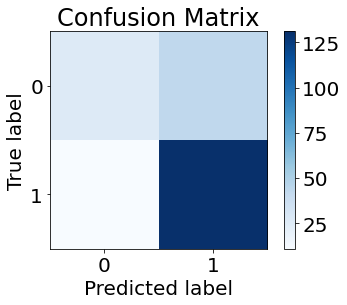

test accuracy: 0.74
train accuracy: 0.82
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          26   43   69
1          11  131  142
All        37  174  211

test report:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49        69
           1       0.75      0.92      0.83       142

    accuracy                           0.74       211
   macro avg       0.73      0.65      0.66       211
weighted avg       0.74      0.74      0.72       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.80      0.54      0.65       257
           1       0.83      0.94      0.88       586

    accuracy                           0.82       843
   macro avg       0.81      0.74      0.76       843
weighted 

SVC()

SVM Accuracy Score is :  0.6729857819905213
Model: SVM
------------------------------------------------------------


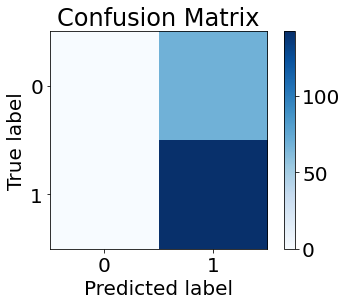

test accuracy: 0.67
train accuracy: 0.7
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    1  All
Actual             
0           69   69
1          142  142
All        211  211

test report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.67      1.00      0.80       142

    accuracy                           0.67       211
   macro avg       0.34      0.50      0.40       211
weighted avg       0.45      0.67      0.54       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.70      1.00      0.82       586

    accuracy                           0.70       843
   macro avg       0.35      0.50      0.41       843
weighted avg       0.48      0

LogisticRegression()

LR Accuracy Score is :  1.0
Model: LR
------------------------------------------------------------


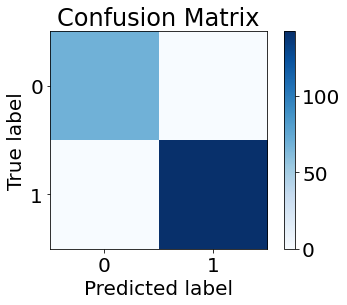

test accuracy: 1.0
train accuracy: 0.99
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           0  142  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       257
           1       0.99      1.00      0.99       586

    accuracy                           0.99       843
   macro avg       0.99      0.98      0.99       843
weighted a

GaussianNB()

NB Accuracy Score is :  0.966824644549763
Model: NB
------------------------------------------------------------


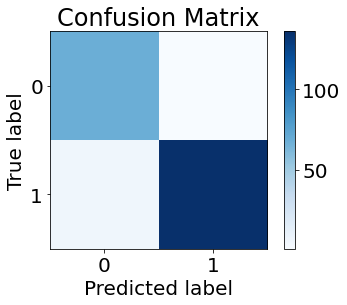

test accuracy: 0.97
train accuracy: 0.97
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          68    1   69
1           6  136  142
All        74  137  211

test report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        69
           1       0.99      0.96      0.97       142

    accuracy                           0.97       211
   macro avg       0.96      0.97      0.96       211
weighted avg       0.97      0.97      0.97       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       257
           1       0.99      0.97      0.98       586

    accuracy                           0.97       843
   macro avg       0.96      0.97      0.97       843
weighted 

In [25]:
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', (accuracy_score(y_test, y_hat_test)))
    metrics(name, y_train, y_test, y_hat_train, y_hat_test)

In [26]:
for name, model in models:
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ',( accuracy_score(y_test, y_hat_test)))

RF Accuracy Score is :  1.0
KNN Accuracy Score is :  0.7440758293838863
SVM Accuracy Score is :  0.6729857819905213
LR Accuracy Score is :  1.0
NB Accuracy Score is :  0.966824644549763


SVC()

SVM Accuracy Score is :  1.0
Model: SVM
------------------------------------------------------------


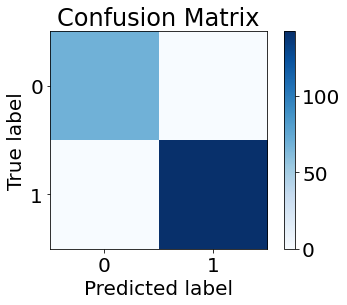

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           0  142  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted av

LogisticRegression()

LR Accuracy Score is :  1.0
Model: LR
------------------------------------------------------------


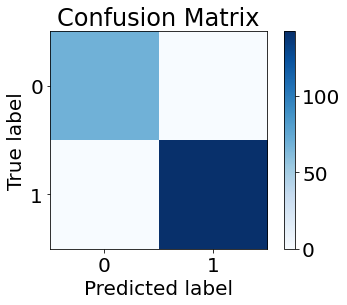

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          69    0   69
1           0  142  142
All        69  142  211

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       142

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       586

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted av

KNeighborsClassifier()

KNN Accuracy Score is :  0.966824644549763
Model: KNN
------------------------------------------------------------


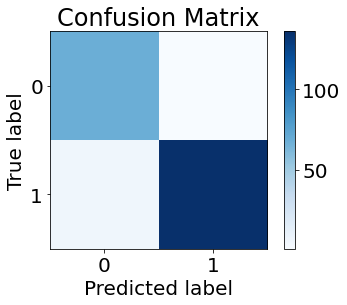

test accuracy: 0.97
train accuracy: 0.97
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          68    1   69
1           6  136  142
All        74  137  211

test report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        69
           1       0.99      0.96      0.97       142

    accuracy                           0.97       211
   macro avg       0.96      0.97      0.96       211
weighted avg       0.97      0.97      0.97       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       257
           1       0.99      0.97      0.98       586

    accuracy                           0.97       843
   macro avg       0.96      0.97      0.97       843
weighted 

GaussianNB()

NB Accuracy Score is :  0.966824644549763
Model: NB
------------------------------------------------------------


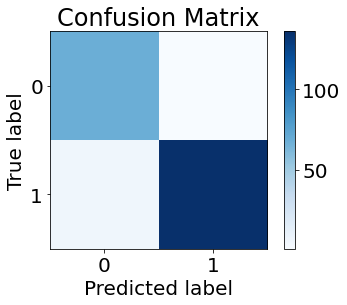

test accuracy: 0.97
train accuracy: 0.97
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          68    1   69
1           6  136  142
All        74  137  211

test report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        69
           1       0.99      0.96      0.97       142

    accuracy                           0.97       211
   macro avg       0.96      0.97      0.96       211
weighted avg       0.97      0.97      0.97       211

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       257
           1       0.99      0.97      0.98       586

    accuracy                           0.97       843
   macro avg       0.96      0.97      0.97       843
weighted 

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
models = []
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_hat_test = model.predict(X_test_scaled).astype(int)
    y_hat_train = model.predict(X_train_scaled).astype(int)
    print(name, 'Accuracy Score is : ', (accuracy_score(y_test, y_hat_test)))
    metrics(name, y_train, y_test, y_hat_train, y_hat_test)

In [28]:
for name, model in models:
    y_hat_test = model.predict(X_test_scaled).astype(int)
    y_hat_train = model.predict(X_train_scaled).astype(int)
    print(name, 'Accuracy Score is : ',( accuracy_score(y_test, y_hat_test)))

SVM Accuracy Score is :  1.0
LR Accuracy Score is :  1.0
KNN Accuracy Score is :  0.966824644549763
NB Accuracy Score is :  0.966824644549763


In [29]:
!pip install  mlxtend --user

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [31]:
from sklearn.model_selection import StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=2, random_state=None)
names = []
scores = []
for name, model in models:
    score = cross_val_score(model, X_train_scaled, y_train, cv=strat_k_fold,scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
    kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
    print(kf_cross_val)


  Name     Score
0  SVM  0.978656
  Name     Score
0  SVM  0.978656
1   LR  0.996443
  Name     Score
0  SVM  0.978656
1   LR  0.996443
2  KNN  0.941870
  Name     Score
0  SVM  0.978656
1   LR  0.996443
2  KNN  0.941870
3   NB  0.951380


In [32]:
# Initialize the dataset
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(knn,k_features=15,
forward=False,
floating=False,
scoring='accuracy',
cv=5)
sfs1 = sfs1.fit(X_train_scaled, y_train)

In [34]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17)


In [35]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs1.transform(X_train_scaled)
X_test_sfs = sfs1.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn.fit(X_train_sfs, y_train)
y_pred = knn.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

KNeighborsClassifier()

Test set accuracy: 98.58 %


In [36]:
mod=GaussianNB(priors=None, var_smoothing=1e-09)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mod,forward=False,k_features=17,floating=False,scoring='accuracy',cv=5)
sfs1 = sfs1.fit(X_train_scaled, y_train)

In [37]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)


In [38]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs1.transform(X_train_scaled)
X_test_sfs = sfs1.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
mod.fit(X_train_sfs, y_train)
y_pred = mod.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

GaussianNB()

Test set accuracy: 97.63 %


In [39]:
svc=SVC(kernel="linear")
sfs1 = SFS(svc,k_features=12,forward=False,floating=False,scoring='accuracy',cv=5)
sfs1 = sfs1.fit(X_train_scaled, y_train)

In [40]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)


In [41]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs1.transform(X_train_scaled)
X_test_sfs = sfs1.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
svc.fit(X_train_sfs, y_train)
y_pred = svc.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

SVC(kernel='linear')

Test set accuracy: 100.00 %


In [42]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
logreg = LogisticRegression(solver='lbfgs', max_iter=100)
# Sequential Forward Selection(sfs)
sfs = SFS(logreg,k_features=10,forward=False,floating=False,scoring = 'accuracy',cv = 5)

In [43]:
sfs.fit(X_train_scaled, y_train)
sfs.k_feature_names_

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(10, 10), scoring='accuracy')

('A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10')

In [44]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs.transform(X_train_scaled)
X_test_sfs = sfs.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
logreg.fit(X_train_sfs, y_train)
y_pred = logreg.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

LogisticRegression()

Test set accuracy: 100.00 %


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, random_state=42)
sfs1 = SFS(rf,k_features=9,forward=False,floating=False,scoring='accuracy',cv=5)
sfs1 = sfs1.fit(X_train_scaled, y_train)

In [46]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 12)


In [47]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs1.transform(X_train_scaled)
X_test_sfs = sfs1.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
rf.fit(X_train_sfs, y_train)
y_pred = rf.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

RandomForestClassifier(random_state=42)

Test set accuracy: 100.00 %
